In [2]:
import cv2
import numpy
import matplotlib.pyplot as plt

In [153]:
camera = cv2.VideoCapture(0)
for j in range(10):
    return_value, image = camera.read()
    cv2.imwrite('test.png', image)
del(camera)

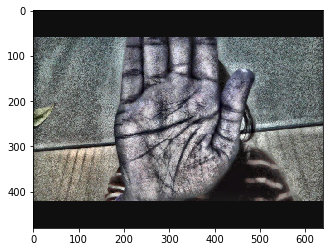

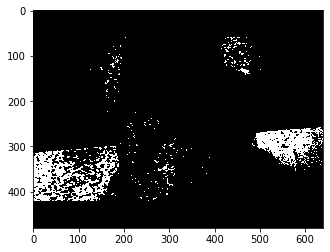

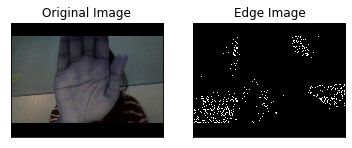

In [154]:
img = cv2.imread('test.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# #2208f1
# rgb(34, 8, 241) => avg [177,247,241]

# Contrast improvement
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20,20))
cl = clahe.apply(l)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
plt.imshow(final, cmap='gray')
plt.show()

# define range of blue color in HSV
lower_blue = numpy.array([5,0,100])
upper_blue = numpy.array([100,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

plt.imshow(mask, cmap='gray')
plt.show()

# edge detection
edges = cv2.Canny(mask,200,300)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

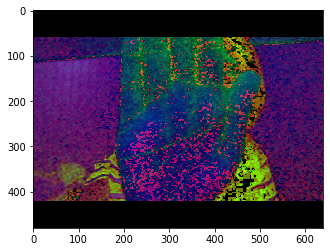

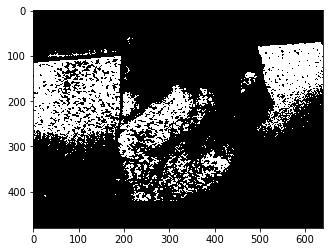

In [135]:
plt.imshow(hsv, cmap='gray')
plt.show()
plt.imshow(mask, cmap='gray')
plt.show()

In [ ]:
img = Image.open('test.png').convert('L')
img = img.resize((300, 200))
img.save('test.png')
img = Image.open('test.png')
np_img = numpy.array(img)
np_img = np_img / 255.0

# Segmentation
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(original, thresh, 'Original', 'Segmented')